<a href="https://colab.research.google.com/github/raquelcreis/CastoresIndomaveis/blob/master/lista002_pandas_matplotlib_Raquel_Reis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista 002 - Pandas, Matplotlib, GeoPandas e Folium.

1. Monte um dataframe contendo todas as informações dos arquivos csv em 'data/transito'.

In [1]:
import pandas as pd

# arquivos csv separados em meses (de jan a jul)
meses = ["janeiro","fevereiro","marco","abril","maio","junho","julho"]
path = "https://raw.githubusercontent.com/raquelcreis/CastoresIndomaveis/master/data/transito/"
csv_str = ".csv"
lista_dfs = []

for mes in meses:
  df_mes = pd.read_csv(path+mes+csv_str,sep=';',low_memory=False)
  lista_dfs.append(df_mes) 

df = pd.concat(lista_dfs,ignore_index=True)

df.head()

,tipo_infracao,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo
0,7234-0,"Em movimento, deixar de manter acesa a luz bai...",Condutor,Automóvel,01/01/2020,00:00,DF004,14,Sentido Decrescente,NaN,-1.582.128.023,-4.788.254.337,Média
1,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,UTILITARIO,01/01/2020,00:00,"DF-025 (EPDB) KM 1,3 (ALT. FLORICULTURAS) SENT...",NaN,NaN,NaN,NaN,NaN,Média
2,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/01/2020,00:01,"DF-001(EPCT)Km 57,6 Sent. Rec. das Emas/Viadut...",NaN,NaN,NaN,NaN,NaN,Média
3,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/01/2020,00:01,"DF-001(EPCT)Km 65,5 Sent. Samambaia/Viaduto do...",NaN,NaN,NaN,NaN,NaN,Média
4,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/01/2020,00:03,"DF-075 (EPNB) KM 2,4 SENT. N. BAND / EPIA (DF-...",NaN,NaN,NaN,NaN,NaN,Média


In [2]:
df.shape

(500495, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500495 entries, 0 to 500494
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   tipo_infracao            500495 non-null  object
 1   descricao                500495 non-null  object
 2   tipo_infrator            500495 non-null  object
 3   tipo_veiculo             500328 non-null  object
 4   cometimento              500495 non-null  object
 5   hora_cometimento         500495 non-null  object
 6   auinf_local_rodovia      500448 non-null  object
 7   auinf_local_km           83575 non-null   object
 8   auinf_local_referencia   82404 non-null   object
 9   auinf_local_complemento  17867 non-null   object
 10  auinf_local_latitude     76044 non-null   object
 11  auinf_local_longitude    76044 non-null   object
 12  grav_tipo                500495 non-null  object
dtypes: object(13)
memory usage: 49.6+ MB


In [4]:
df.columns

Index(['tipo_infracao', 'descricao', 'tipo_infrator', 'tipo_veiculo',
       'cometimento', 'hora_cometimento', 'auinf_local_rodovia',
       'auinf_local_km', 'auinf_local_referencia', 'auinf_local_complemento',
       'auinf_local_latitude', 'auinf_local_longitude', 'grav_tipo'],
      dtype='object')

2. Quantos tipos diferentes de gravidade de infração exitem no dataset? Quais são?

In [5]:
df.grav_tipo.nunique()

4

In [6]:
df.grav_tipo.unique()

array(['Média', 'Gravíssima', 'Grave', 'Leve'], dtype=object)

3. Qual a hora do dia que mais se cometem infrações graves? Demonstre utilizando um gráfico de linhas.

In [7]:
# criada uma coluna que vai armazenar apenas a hora 
df['hora_cometimento_2'] = pd.to_datetime(df['hora_cometimento'],format='%H:%M').dt.hour

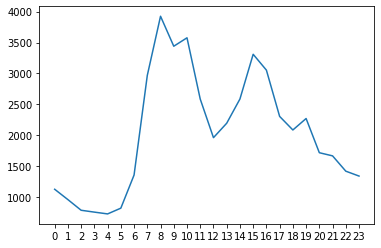

In [8]:
import matplotlib.pyplot as plt

mask = df.grav_tipo == 'Grave' #filtro infrações graves

data_plot = df[mask].hora_cometimento_2.value_counts().sort_index()
x1 = range(24) #eixo x mostrando todas as horas

plt.plot(data_plot.index,data_plot.values)
plt.xticks(x1)
plt.show()

In [9]:
#a hora que mais acontece infrações graves
horas = df[mask].hora_cometimento_2.value_counts()
horas.index[0]

8

4. Qual dia da semana que mais se cometem infrações leves? Demonstre utilizando um gráfico de linhas e coloando um texto no ponto máximo.

In [10]:
# criando coluna de dia da semana
df['dia_semana'] = pd.to_datetime(df['cometimento'],format='%d/%m/%Y',yearfirst=True).dt.dayofweek
dias_semana = {0:'Segunda-Feira',1:'Terça-Feira',2:'Quarta-Feira',3:'Quinta-Feira',4:'Sexta-Feira',5:'Sábado',6:'Domingo'}

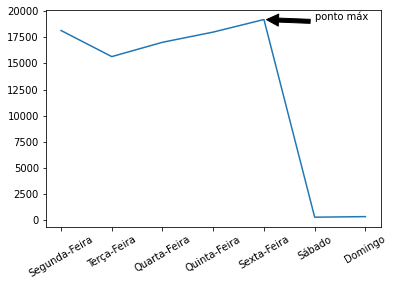

In [11]:
mask2 = df.grav_tipo == 'Leve' #filtro infrações leves

data_plot2 = df[mask2].dia_semana.value_counts().sort_index()
data_plot2.index = data_plot2.index.map(dias_semana)
plot2_max = max(data_plot2.values)


plt.plot(data_plot2.index,data_plot2.values)
plt.annotate('ponto máx', xy=(4, 19201), xytext=(5, 19201),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.xticks(rotation=30)
plt.show()

5. Filtre o dataset pelo tipo de condutor 'condutor', qual o tipo de infração mais comum? Em que horário ele mais acontece? Monte um subplot para demonstrar as duas informações utilizando gráficos.

In [12]:
df.groupby('tipo_infrator')['tipo_infracao'].count()

tipo_infrator
Condutor           479592
Pessoa Física           1
Pessoa Jurídica         1
Proprietário        20901
Name: tipo_infracao, dtype: int64

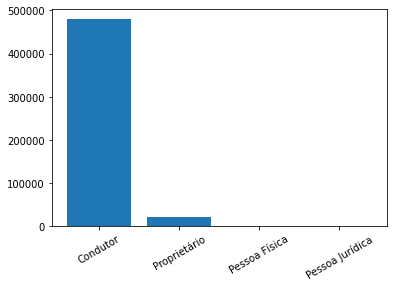

In [13]:
# de 500495 observações, apenas 1 é de pessoa jurídica
data_plot3 = df.tipo_infrator.value_counts()
plt.bar(data_plot3.index,data_plot3.values)

plt.xticks(rotation=30)
plt.show()

In [14]:
#horário que aconteceu a infração pela pessoa jurídica
df.loc[df.tipo_infrator == 'Pessoa Jurídica','hora_cometimento']

216068    01:36
Name: hora_cometimento, dtype: object

In [15]:
#tipo de infração que a pessoa jurídica cometeu
df.loc[df.tipo_infrator == 'Pessoa Jurídica','grav_tipo']

216068    Gravíssima
Name: grav_tipo, dtype: object

6. Monte um subplot com 7 heatmaps (1 para cada mês) demonstrando a concentração da quantidade infrações por dia do mês e hora do dia (desconsidere os minutos).

In [16]:
#criar coluna do dia e do mes
df['dia_cometimento'] = pd.to_datetime(df['cometimento'],format='%d/%m/%Y',yearfirst=True).dt.day
df['mes_cometimento'] = pd.to_datetime(df['cometimento'],format='%d/%m/%Y',yearfirst=True).dt.month

In [17]:
#selecionando apenas as coluna de mes, dia e hora e filtrando pelo mês
meses = [1,2,3,4,5,6,7]
grupo = df[['mes_cometimento','dia_cometimento','hora_cometimento_2']]
for i in meses:
  mask = grupo.mes_cometimento == i
  exec('grupo{} = grupo[mask]'.format(i))

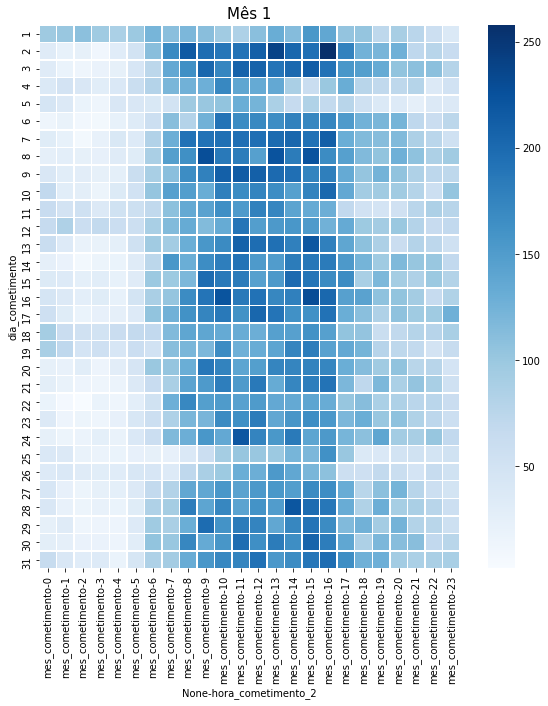

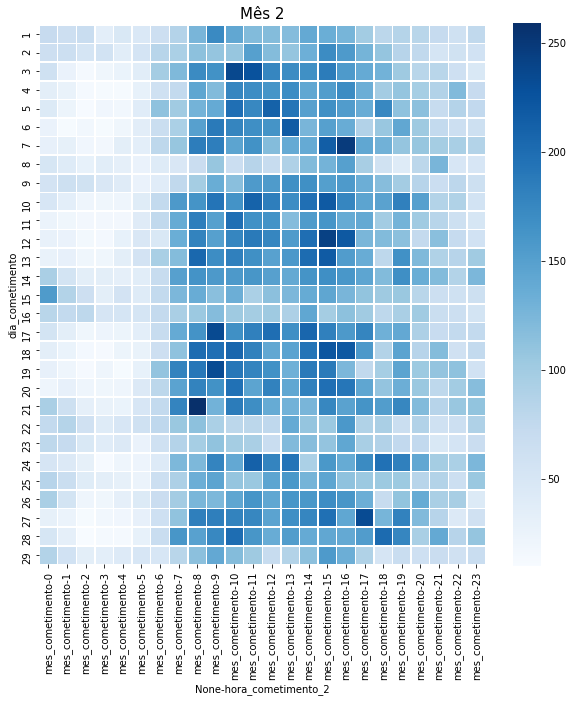

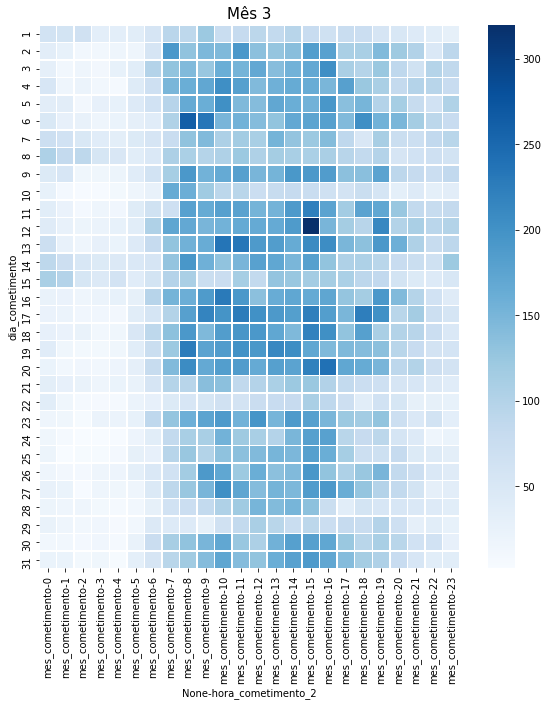

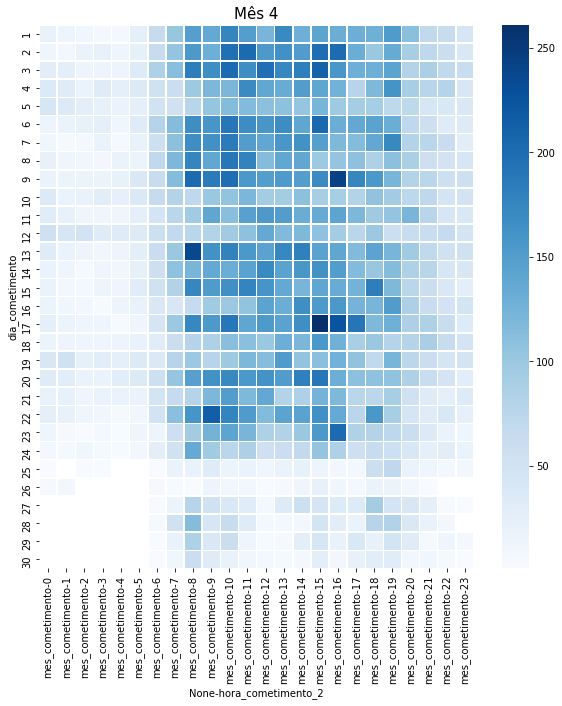

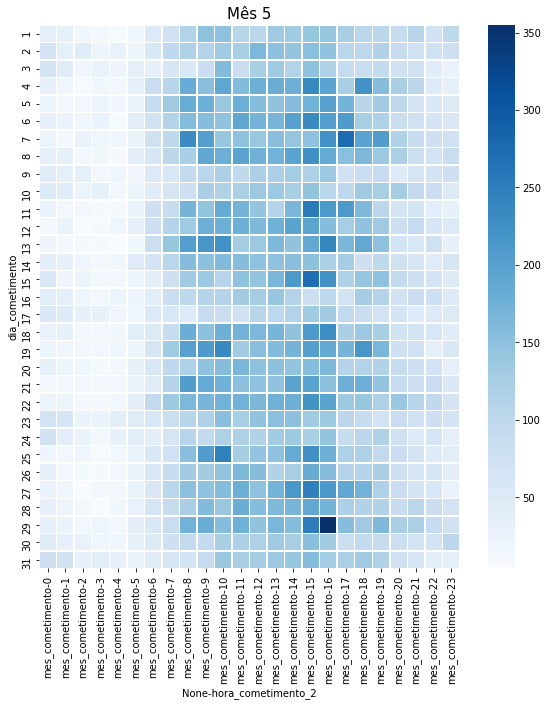

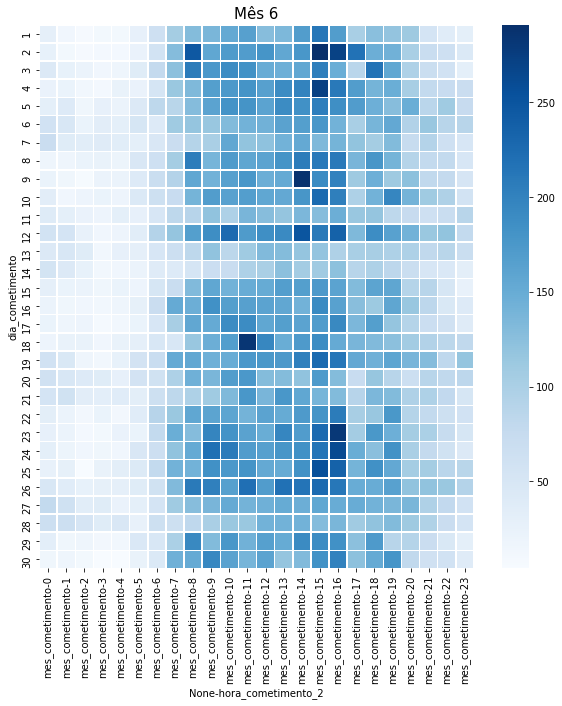

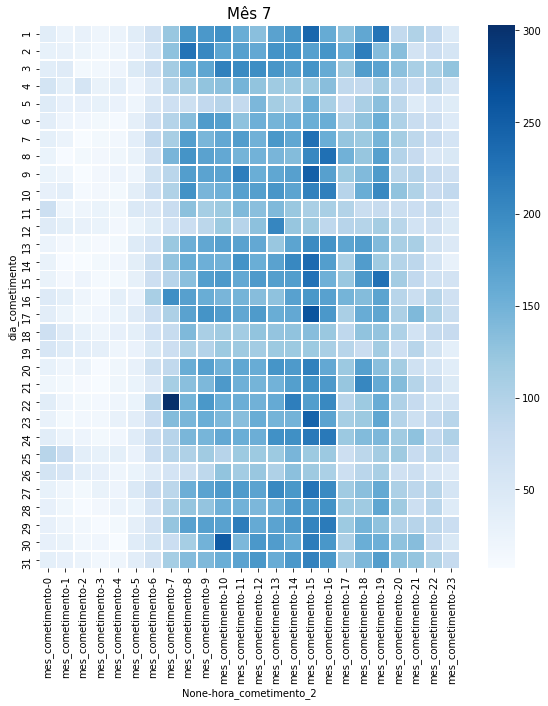

In [18]:
import seaborn as sns

for i in meses:
  exec('grupo = grupo{}'.format(i))
  heat_mes = pd.pivot_table(grupo,index='dia_cometimento', columns='hora_cometimento_2',aggfunc='count')
  plt.figure(figsize=(10,10))
  plt.title('Mês {}'.format(i),size=15)
  sns.heatmap(heat_mes,cmap="Blues",linewidths=.5,square=True)
  plt.show()

7. Alguma bicicleta já tomou multa? Se sim, qual foi a gravidade?

In [19]:
df[df.tipo_veiculo == 'Bicicleta'].grav_tipo

235753    Grave
Name: grav_tipo, dtype: object

___

8. Leia as informações de cada rodovia utilizando o link abaixo e guarde em um dataframe.

'http://dados.df.gov.br/dataset/3cb44f4a-576c-45b8-8f13-ae94a6623277/resource/2bd0f48e-d3a1-47c6-bd12-83aed24e9461/download/2020-05-19-scr.csv'

In [20]:
df2 = pd.read_csv('http://dados.df.gov.br/dataset/3cb44f4a-576c-45b8-8f13-ae94a6623277/resource/2bd0f48e-d3a1-47c6-bd12-83aed24e9461/download/2020-05-19-scr.csv',sep=';',encoding='latin-1',low_memory=False)
df2.head()

,RODOVIA,COD. TRECHO,INÍCIO,FIM,Km INÍCIO,Km FIM,EXTENSÃO,TP. RODOVIA,SITUAÇÃO,DESC. SITUAÇÃO,RESPONSÁVEL,DESC. RESPONSÁVEL,D.R,DESC. D.R,TMDA,LARG. PISTA,LARG. ACOSTAMENTO,MAT. REVESTIMENTO
0,BR010,010BDF0010,ENTR. BR-020 (A)/BR-030 (A)/DF-003(EPIA)DF-001...,ENTR. DF-440,0.0,2.5,2.5,Federal,DUP,Duplicado,DNIT,Departamento Nacional de Infra-Estrutura de Tr...,NaN,NaN,NaN,NaN,NaN,NaN
1,BR010,010BDF0015,ENTR. DF-440,ACESSO I A SOBRADINHO,2.5,6.0,3.5,Federal,DUP,Duplicado,DNIT,Departamento Nacional de Infra-Estrutura de Tr...,NaN,NaN,NaN,NaN,NaN,NaN
2,BR010,010BDF0016,ACESSO I A SOBRADINHO,ACESSO II A SOBRADINHO,6.0,8.4,2.4,Federal,DUP,Duplicado,DNIT,Departamento Nacional de Infra-Estrutura de Tr...,NaN,NaN,NaN,NaN,NaN,NaN
3,BR010,010BDF0018,ACESSO II A SOBRADINHO,ENTR. DF-230,8.4,18.8,10.4,Federal,DUP,Duplicado,DNIT,Departamento Nacional de Infra-Estrutura de Tr...,2º DR,SEGUNDO DISTRITO RODOVIÁRIO,NaN,NaN,NaN,NaN
4,BR010,010BDF0020,ENTR. DF-230,ENTR. DF-128,18.8,22.6,3.8,Federal,DUP,Duplicado,DNIT,Departamento Nacional de Infra-Estrutura de Tr...,1º DR,PRIMEIRO DISTRITO RODOVIÁRIO,NaN,NaN,NaN,NaN


In [21]:
df2.shape

(633, 18)

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RODOVIA            633 non-null    object 
 1   COD. TRECHO        633 non-null    object 
 2   INÍCIO             633 non-null    object 
 3   FIM                633 non-null    object 
 4   Km INÍCIO          633 non-null    float64
 5   Km FIM             633 non-null    float64
 6   EXTENSÃO           633 non-null    float64
 7   TP. RODOVIA        633 non-null    object 
 8   SITUAÇÃO           633 non-null    object 
 9   DESC. SITUAÇÃO     633 non-null    object 
 10  RESPONSÁVEL        633 non-null    object 
 11  DESC. RESPONSÁVEL  633 non-null    object 
 12  D.R                599 non-null    object 
 13  DESC. D.R          599 non-null    object 
 14  TMDA               375 non-null    float64
 15  LARG. PISTA        0 non-null      float64
 16  LARG. ACOSTAMENTO  0 non-n

9. Investigando OS TRECHOS responda (TRUE ou FALSE).

> 9.1 Trechos em rodovias 'Distrital' possuem a mesma mediana de extensão de trechos em rodovias 'Federal'. Crie um boxplot para demonstrar e não esqueça de colocar legendas e anotação de texto.

In [23]:
df2 = df2.rename(columns={'TP. RODOVIA': 'tp_rodovia'})

In [24]:
mask_dis = (df2.tp_rodovia == 'Distrital')
mask_fed = (df2.tp_rodovia == 'Federal')

grupo_trecho = df2[mask_dis | mask_fed]

In [25]:
df2[mask_dis].EXTENSÃO.median() == df2[mask_fed].EXTENSÃO.median()

False

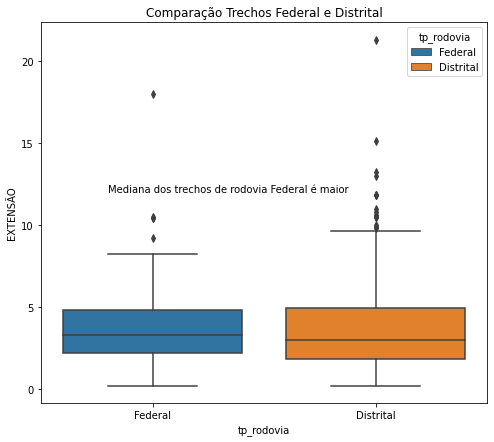

In [26]:
plt.figure(figsize=(8,7))
sns.boxplot(x="tp_rodovia",y="EXTENSÃO",hue="tp_rodovia",data=grupo_trecho,dodge=False,linewidth= 1.5)
plt.title('Comparação Trechos Federal e Distrital',size=12)
plt.annotate("Mediana dos trechos de rodovia Federal é maior",xy=(-0.2,12))
plt.show()


> 9.2 Em termos de extensão, existem mais kms de pista duplicada ('DUP') do que pista pavimentada ('PAV'). Demonstre através de um gráfico de barra.

In [27]:
df2.SITUAÇÃO[df2.SITUAÇÃO == 'DUP'].count() > df2.SITUAÇÃO[df2.SITUAÇÃO == 'PAV'].count()

False

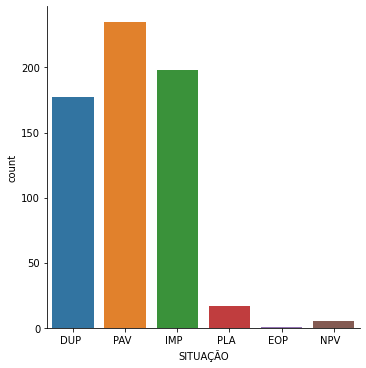

In [28]:
sns.catplot(x="SITUAÇÃO",kind='count', data=df2)
plt.show()

> 9.3 Existem somente duas rodovias com mais de 30 trechos. 

In [29]:
df2 = df2.rename(columns={'COD. TRECHO': 'trecho'})

In [30]:
grupo_rodovia = df2.groupby('RODOVIA')['trecho'].count() > 30 
grupo_rodovia.value_counts()

False    155
True       2
Name: trecho, dtype: int64

True

> 9.4 A distribuição das extensões dos trechos das rodovias federais segue uma distribuição normal. (Demonstre com um gráfico e um teste estatístico)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


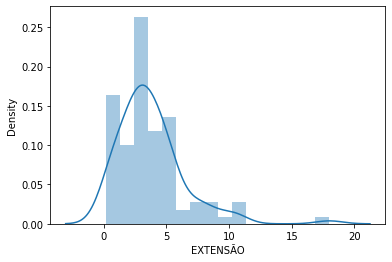

In [31]:
dist_fed = df2[mask_fed].EXTENSÃO

sns.distplot(dist_fed)
plt.show()

In [32]:
#teste de hipoteses que testa a hipotese nula de que os dados seguem uma dist normal
import scipy.stats as sct
sct.normaltest(dist_fed)

NormaltestResult(statistic=58.97165058798574, pvalue=1.5648358259291778e-13)

Pelo teste estatístico, temos um p-valor bem pequeno. Podemos rejeitar a hipótese nula de que a distribuição segue a distribuição normal.

False

> 9.5 Existe uma diferença estatística entre as médias das extensões da rodovias vicinais e federais. (Demonstre com um teste estatístico)


In [33]:
mask_vic = (df2.tp_rodovia == 'Vicinal')
dist_vic = df2[mask_vic].EXTENSÃO

In [34]:
#teste de hipoteses que testa a hipotése nula de que duas amostras independentes possuem mesma media esperada
sct.ttest_ind(dist_fed,dist_vic,equal_var = False)

Ttest_indResult(statistic=-1.0494743912825215, pvalue=0.2956725948963141)

Pelo teste estatístico, não podemos rejeitar a hipótese nula. Não há diferença estatística entre as médias.

False

> 9.6 O 2º DR tem, em média, o maior TMDA (tráfego diário médio anual) se comparado com as médias dos outros distritos. (Demonstre utilizando um gráfico).

In [35]:
df2 = df2.rename(columns={'D.R': 'dr'})

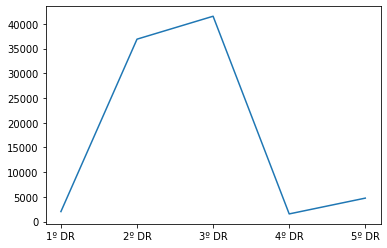

In [36]:
grupo_tmda = df2[['dr','TMDA']]
dr_tmda = pd.pivot_table(grupo_tmda,index='dr')
plt.plot(dr_tmda)
plt.show()

False

___

11. Leia as informações de Obra de Arte Especial (OAE) utilizando o link abaixo e guarde em um dataframe.

'http://dados.df.gov.br/dataset/468f0b08-f5ae-4d61-954c-3062a9d26dad/resource/fac7a26a-baa3-4250-9ae5-b9c7273ae8df/download/2020-05-19-oae.csv'

In [37]:
df3 = pd.read_csv('http://dados.df.gov.br/dataset/468f0b08-f5ae-4d61-954c-3062a9d26dad/resource/fac7a26a-baa3-4250-9ae5-b9c7273ae8df/download/2020-05-19-oae.csv',sep=';',encoding='latin-1',low_memory=False)
df3.head()

,COD. OAE,DESCRITIVO,TIPO DE OAE,COD. SITUAÇÃO,SITUAÇÃO,TP. ESTRUTURAL,REG. ADMINISTRATIVA,SETOR,DISTRITO,RODOVIA,COD. TRECHO,DESCRITIVO.1,km,PISTA,COMP. TOTAL,LARG. TOTAL,ANO DE CONTRUÇÃO,ANO DO PROJETO,RAMPA,EM CURVA,Nº DE PISTAS,Nº DE FAIXAS,LARG. ACOSTAMENTO,LARG. PASSEIO,ALT. GUARDA-CORPO,LARG. AFASTAMENTOS,LATITUTE,LONGITUDE
0,1,Ponte sobre Rio Urubu,PONTE,14,Boa,Concreto,NaN,2º DR,SEGUNDO DISTRITO RODOVIÁRIO,DF005,005EDF0012,ENTR. DF-006 (EPCA) - ENTR. DF-442,2.558,Dupla,26.00,14.0,NaN,NaN,N,N,1.0,2.0,NaN,5.10,0.15,NaN,-15.717.124.576.250,-47.865.095.411.000
1,2,Ponte 1 sobre Córrego Tamanduá,PONTE,14,Boa,Concreto,NaN,2º DR,SEGUNDO DISTRITO RODOVIÁRIO,DF005,005EDF0014,ENTR. DF-442 - ENTR. DF-015 (EPTM),9.418,NaN,26.41,13.0,NaN,NaN,N,N,NaN,NaN,NaN,4.00,0.15,NaN,-15.750.428.216.750,-47.814.948.902.250
2,3,Viaduto sobre DF003 - Eixo Monumental/Taguatinga,VIAD. SOBRE ROD./RUA,14,Boa,Concreto,NaN,2º DR,SEGUNDO DISTRITO RODOVIÁRIO,DF003,003EDF0090,ENTR. DF-010 (EPAA) (ACESSO AO SAIN /SMU) - EN...,12.929,Dupla,111.00,22.0,NaN,NaN,N,N,NaN,NaN,NaN,1.33,0.20,NaN,-15.774.612.361.653,-47.937.965.129.068
3,4,Viaduto 1 na DF003 sobre rodovia de acesso ao SMU,VIAD. SOBRE ROD./RUA,12,Ruim,Concreto,NaN,2º DR,SEGUNDO DISTRITO RODOVIÁRIO,DF003,003EDF0090,ENTR. DF-010 (EPAA) (ACESSO AO SAIN /SMU) - EN...,10.906,Dupla,38.25,12.6,NaN,NaN,N,N,NaN,NaN,NaN,0.70,0.30,0.7,-15.758.446.956.227,-47.928.382.039.529
4,5,Viaduto 1 Colorado,VIAD. SOBRE ROD./RUA,14,Boa,Concreto,NaN,2º DR,SEGUNDO DISTRITO RODOVIÁRIO,BR010,010BDF0010,ENTR. BR-020 (A)/BR-030 (A)/DF-003(EPIA)DF-001...,0.244,NaN,56.60,15.6,NaN,NaN,N,N,NaN,NaN,NaN,1.20,0.20,NaN,-15.687.729.224.750,-47.857.120.883.000


In [38]:
df3.shape

(334, 28)

In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COD. OAE             334 non-null    int64  
 1   DESCRITIVO           334 non-null    object 
 2   TIPO DE OAE          334 non-null    object 
 3   COD. SITUAÇÃO        334 non-null    int64  
 4   SITUAÇÃO             334 non-null    object 
 5   TP. ESTRUTURAL       334 non-null    object 
 6   REG. ADMINISTRATIVA  1 non-null      object 
 7   SETOR                334 non-null    object 
 8   DISTRITO             334 non-null    object 
 9   RODOVIA              334 non-null    object 
 10  COD. TRECHO          334 non-null    object 
 11  DESCRITIVO.1         334 non-null    object 
 12  km                   334 non-null    float64
 13  PISTA                210 non-null    object 
 14  COMP. TOTAL          323 non-null    float64
 15  LARG. TOTAL          323 non-null    flo

12. Avalie (TRUE OU FALSE):

> 12.1 A correlação entre a quantidade de OAE e a extensão total das rodovias (soma da extensão dos trechos) é maior do que 0.8.

In [40]:
df3[['COD. OAE','COMP. TOTAL']].corr()

,COD. OAE,COMP. TOTAL
COD. OAE,1.00000,0.23366
COMP. TOTAL,0.23366,1.00000


False


> 12.2 A correlação entre a largura do passeio e a altura do guarda-corpo das pontes é menor do que 0.2.

In [41]:
df3[['LARG. TOTAL','ALT. GUARDA-CORPO']].corr()

,LARG. TOTAL,ALT. GUARDA-CORPO
LARG. TOTAL,1.000000,-0.006816
ALT. GUARDA-CORPO,-0.006816,1.000000


True

13. Siga as instruções.

> 13.1 Crie um dataframe chamado dist_oae com as informações COD.OAE, LONGITUDE, LATITUDE de cada OAE.

In [42]:
dist_oae = df3.iloc[: , [0,26,27]].copy()

In [43]:
dist_oae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   COD. OAE   334 non-null    int64 
 1   LATITUTE   334 non-null    object
 2   LONGITUDE  334 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.0+ KB


In [44]:
dist_oae.shape

(334, 3)

> 13.2 Trate as colunas de latitude e longitude, transformando-as de string para float. (ex: '-47.865.095.411.000' de ser transformado em -47.865095411000)

In [46]:
#tirar todos os pontos da string e depois adicionar apenas o primeiro ponto
dist_oae['LATITUTE'] = dist_oae['LATITUTE'].str.replace('.','')
dist_oae['LONGITUDE'] = dist_oae['LONGITUDE'].str.replace('.','')

for i in range(0,len(dist_oae)):
  lat = dist_oae.loc[i,'LATITUTE']
  long = dist_oae.loc[i,'LONGITUDE']
  lat = lat[:3] + "." + lat[3:]
  long = long[:3] + "." + long[3:]
  dist_oae.loc[i,'LATITUTE'] = lat
  dist_oae.loc[i,'LONGITUDE'] = long

In [47]:
dist_oae['LATITUTE'] = dist_oae['LATITUTE'].apply(float)
dist_oae['LONGITUDE'] = dist_oae['LONGITUDE'].apply(float)

> 13.3 Transforme dist_oae em um GeoDataFrame e no parâmetro geometry passe a função do geopandas points_fromn_xy com as informações de longitude e latitude em fortmato de serie.

In [48]:
!pip install --upgrade geopandas

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 14.8MB 294kB/s 
     |████████████████████████████████| 10.9MB 46.9MB/s 


In [49]:
import geopandas

dist_oae = geopandas.GeoDataFrame(dist_oae,
                             geometry = geopandas.points_from_xy(dist_oae.LONGITUDE,dist_oae.LATITUTE))

In [50]:
dist_oae.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   COD. OAE   334 non-null    int64   
 1   LATITUTE   334 non-null    float64 
 2   LONGITUDE  334 non-null    float64 
 3   geometry   334 non-null    geometry
dtypes: float64(2), geometry(1), int64(1)
memory usage: 10.6 KB


14. Usando os pontos em geometry do GeoDataFrame dist_oae monte um mapa utilizando folium que contenha todas as obras de artes especiais (dica: para extrair a latitude ou longitude de um ponto basta utilizar os métodos .x ou .y). Adicione no tooltip de cada Marker o tipo da OAE.

In [51]:
import folium as fl

In [59]:
#criar mapa
m = fl.Map(location=[-15.8372, -47.870445],tiles='OpenStreetMap',zoom_start=13,zoom_control=False)

In [60]:
#puxando a informação do tipo de OAE para o tooltip
dist_oae["tipo_oae"] = df3.iloc[: ,2].copy()

In [61]:
#marcadores no mapa

for i in range(0,len(dist_oae)):
  fl.Marker([dist_oae.loc[i,'LATITUTE'],dist_oae.loc[i,'LONGITUDE']],tooltip= dist_oae.loc[i,'tipo_oae']).add_to(m)


In [62]:
m











15. Descubra a distância entre a OAE de código 1 e todas as outras OAE (utilize o método .distance de cada point em geometry). Crie um subplot com 2 gráficos, o primeiro deverá conter um histograma de todas as distâncias e o segundo deverá ser um boxplot de todas as distâncias.

In [56]:
#distancia da OAE cód. 1 para todas as outras OAE

In [63]:
dist_oae0 = []

In [64]:
for i in range(1,len(dist_oae)):
  d = dist_oae.geometry[0].distance(dist_oae.geometry[i])
  dist_oae0.append(d)

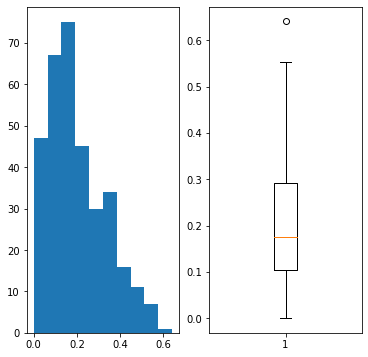

In [69]:
#grid
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(1, 2, hspace=0.2, wspace=0.2)
dist_hist = fig.add_subplot(grid[0, 0])
dist_box = fig.add_subplot(grid[0, 1])

# histograma
dist_hist.hist(dist_oae0)
# boxplot
dist_box.boxplot(dist_oae0)

plt.show()